# Etapa 1

In [38]:
!pip install kaggle
!pip install kagglehub
!pip install sidetable
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=912544fb34b0d7388a0a120611f7e2ad3bcbb27e73256fa94605a56015e90e0c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
from ydata_profiling import ProfileReport

import kagglehub

In [14]:
sns.set_style('darkgrid')

In [13]:
df = pd.read_csv('/content/vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [15]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
df_missing = (
  df.isna().sum()
  .to_frame('missing_values')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_values', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

In [17]:
df[df.Year.isna()]

Rank                         Name Platform  Year         Genre  \
179      180              Madden NFL 2004      PS2   NaN        Sports   
377      378             FIFA Soccer 2004      PS2   NaN        Sports   
431      432   LEGO Batman: The Videogame      Wii   NaN        Action   
470      471   wwe Smackdown vs. Raw 2006      PS2   NaN      Fighting   
607      608               Space Invaders     2600   NaN       Shooter   
...      ...                          ...      ...   ...           ...   
16307  16310                Freaky Flyers       GC   NaN        Racing   
16327  16330                    Inversion       PC   NaN       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan      PS3   NaN     Adventure   
16427  16430                 Virtua Quest       GC   NaN  Role-Playing   
16493  16496                   The Smurfs      3DS   NaN        Action   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           Electronic Arts      4.26      0.26      0.01   
377                           Electronic Arts      0.59      2.36      0.04   
431    Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
470                                       NaN      1.57      1.02      0.00   
607                                     Atari      2.36      0.14      0.00   
...                                       ...       ...       ...       ...   
16307                                 Unknown      0.01      0.00      0.00   
16327                      Namco Bandai Games      0.01      0.00      0.00   
16366                                 Unknown      0.01      0.00      0.00   
16427                                 Unknown      0.01      0.00      0.00   
16493                                 Unknown      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
179           0.71          5.23  
377           0.51          3.49  
431           0.29          3.17  
470           0.41          3.00  
607           0.03          2.53  
...            ...           ...  
16307         0.00          0.01  
16327         0.00          0.01  
16366         0.00          0.01  
16427         0.00          0.01  
16493         0.00          0.01  

[271 rows x 11 columns]

In [18]:
df[df.Publisher.isna()]

Rank                                               Name Platform  \
470      471                         wwe Smackdown vs. Raw 2006      PS2   
1303    1305                                     Triple Play 99       PS   
1662    1664       Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA   
2222    2224                                 Bentley's Hackpack      GBA   
3159    3161  Nicktoons Collection: Game Boy Advance Video V...      GBA   
3166    3168  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
3766    3768  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
4145    4147                                 Sonic the Hedgehog      PS3   
4526    4528  The Fairly Odd Parents: Game Boy Advance Video...      GBA   
4635    4637  The Fairly Odd Parents: Game Boy Advance Video...      GBA   
5302    5304      Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)      Wii   
5647    5649  Cartoon Network Collection: Game Boy Advance V...      GBA   
6272    6274  The Legend of Zelda: The Minish Cap(weekly JP ...      GBA   
6437    6439           Sonic X: Game Boy Advance Video Volume 1      GBA   
6562    6564  Dora the Explorer: Game Boy Advance Video Volu...      GBA   
6648    6650  Cartoon Network Collection: Game Boy Advance V...      GBA   
6849    6851     All Grown Up!: Game Boy Advance Video Volume 1      GBA   
7208    7210  Nicktoons Collection: Game Boy Advance Video V...      GBA   
7351    7353                     Yu Yu Hakusho: Dark Tournament      PS2   
7470    7472  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
7953    7955                   Thomas the Tank Engine & Friends      GBA   
8330    8332    Dragon Ball GT: Game Boy Advance Video Volume 1      GBA   
8341    8343  Codename: Kids Next Door: Game Boy Advance Vid...      GBA   
8368    8370  Teenage Mutant Ninja Turtles: Game Boy Advance...      GBA   
8503    8505                                       Stronghold 3       PC   
8770    8772  Cartoon Network Collection: Game Boy Advance V...      GBA   
8848    8850  Pokémon: Johto Photo Finish: Game Boy Advance ...      GBA   
8896    8898  Strawberry Shortcake: Game Boy Advance Video V...      GBA   
9517    9519                             Farming Simulator 2011       PC   
9749    9751  Super Robot Wars OG Saga: Masou Kishin II - Re...      PSP   
10382  10384                   Disney Channel Collection Vol. 1      GBA   
10494  10496             Atsumare! Power Pro Kun no DS Koushien       DS   
11076  11078                       Action Man-Operation Extreme       PS   
11526  11528  Cartoon Network Collection: Game Boy Advance V...      GBA   
12487  12489                               Chou Soujuu Mecha MG       DS   
12517  12519       Prinny: Can I Really Be The Hero? (US sales)      PSP   
13278  13280                     Monster Hunter Frontier Online      PS3   
13672  13674                          B.L.U.E.: Legend of Water       PS   
13962  13964                                     World of Tanks     X360   
14087  14089                                       Housekeeping       DS   
14296  14299                                Bikkuriman Daijiten       DS   
14311  14314                                      Silverlicious       DS   
14698  14701                                 UK Truck Simulator       PC   
14942  14945  Umineko no Naku Koro ni San: Shinjitsu to Gens...      PS3   
15056  15059                                            Xia-Xia       DS   
15261  15264                                       Mario Tennis      3DS   
15325  15328  Nicktoons Collection: Game Boy Advance Video V...      GBA   
15353  15356                   Demolition Company: Gold Edition       PC   
15788  15791  Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...      PSV   
15915  15918                                       Dream Dancer       DS   
16191  16194                    Homeworld Remastered Collection       PC   
16198  16201             AKB1/48: Idol to Guam de Koishi

In [25]:
df.dropna(inplace=True)
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [26]:
df_missing = (
  df.isna().sum()
  .to_frame('missing_values')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_values', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [28]:
df = df.astype({'Year':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [29]:
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

<ipython-input-31-311b77cfed6d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre.index, y=top_genre.values, palette="viridis");


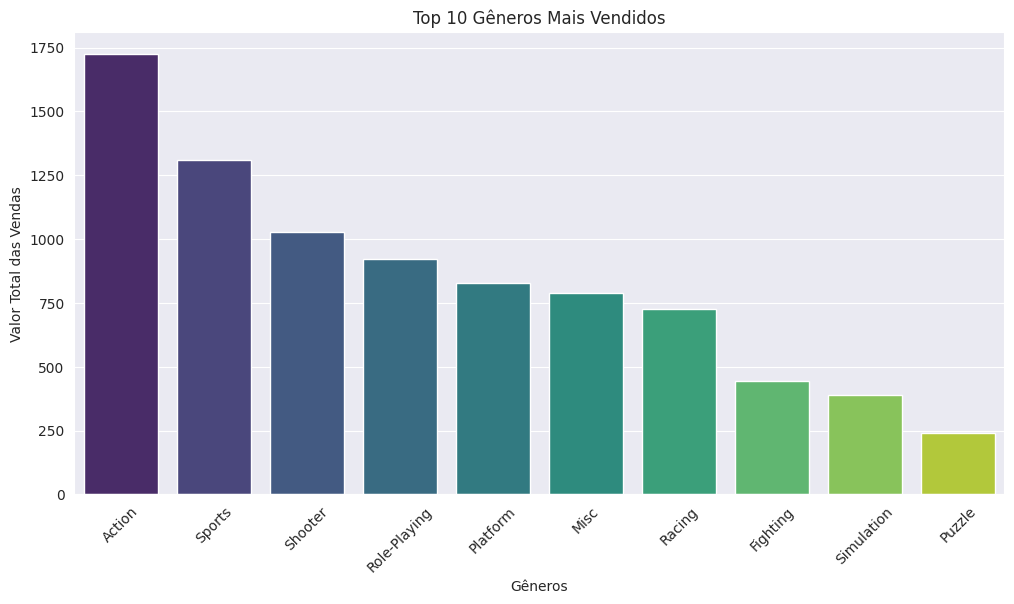

In [31]:
top_genre = df.groupby("Genre")["Global_Sales"].sum().nlargest(10);

plt.figure(figsize=(12, 6));
sns.barplot(x=top_genre.index, y=top_genre.values, palette="viridis");
plt.xticks(rotation=45);
plt.title("Top 10 Gêneros Mais Vendidos");
plt.ylabel("Valor Total das Vendas");
plt.xlabel("Gêneros");
plt.show();

<ipython-input-33-ca91612ecb95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platform.index, y=top_platform.values, palette="viridis");


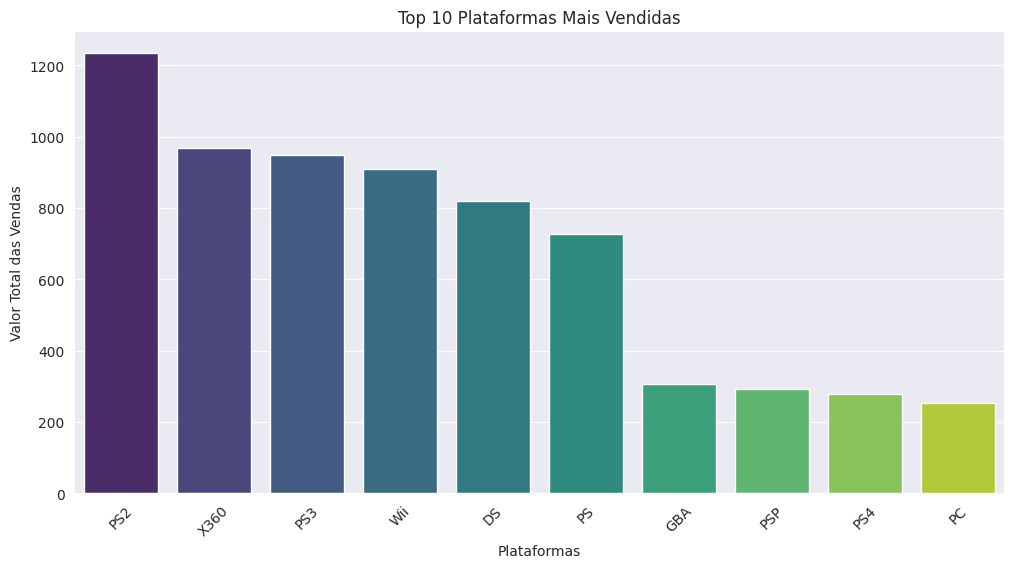

In [33]:
top_platform = df.groupby("Platform")["Global_Sales"].sum().nlargest(10);

plt.figure(figsize=(12, 6));
sns.barplot(x=top_platform.index, y=top_platform.values, palette="viridis");
plt.xticks(rotation=45);
plt.title("Top 10 Plataformas Mais Vendidas");
plt.ylabel("Valor Total das Vendas");
plt.xlabel("Plataformas");
plt.show();

<ipython-input-36-dfbf13f06358>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publisher.index, y=top_publisher.values, palette="viridis");


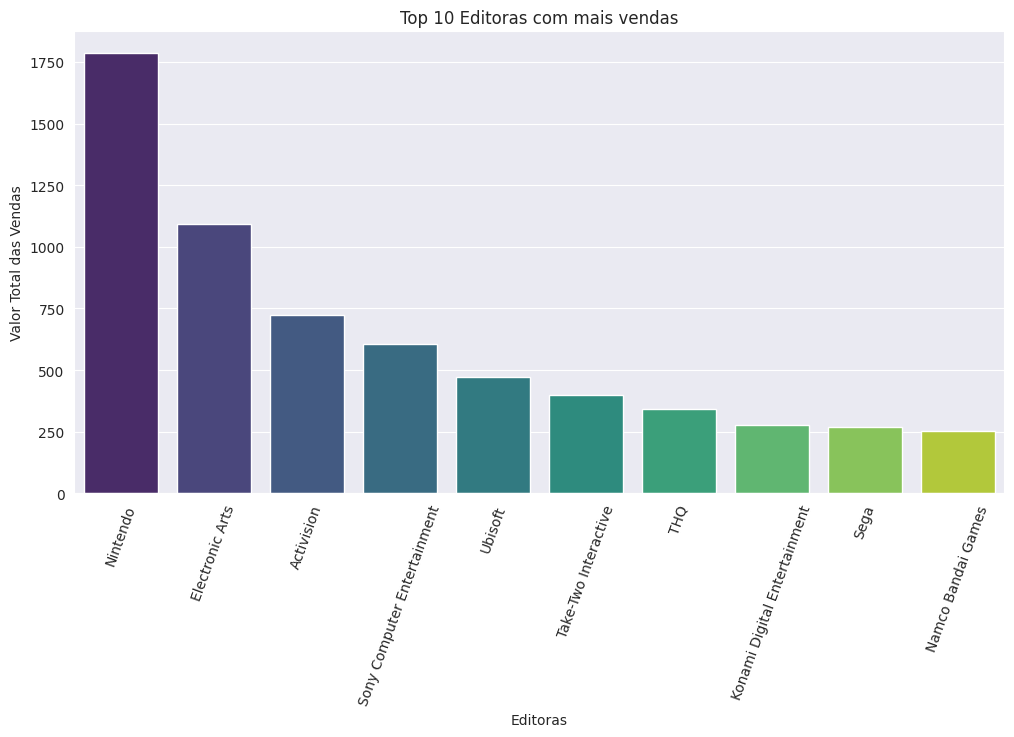

In [36]:
top_publisher = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10);

plt.figure(figsize=(12, 6));
sns.barplot(x=top_publisher.index, y=top_publisher.values, palette="viridis");
plt.xticks(rotation=70);
plt.title("Top 10 Editoras com mais vendas");
plt.ylabel("Valor Total das Vendas");
plt.xlabel("Editoras");
plt.show();

In [37]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [40]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

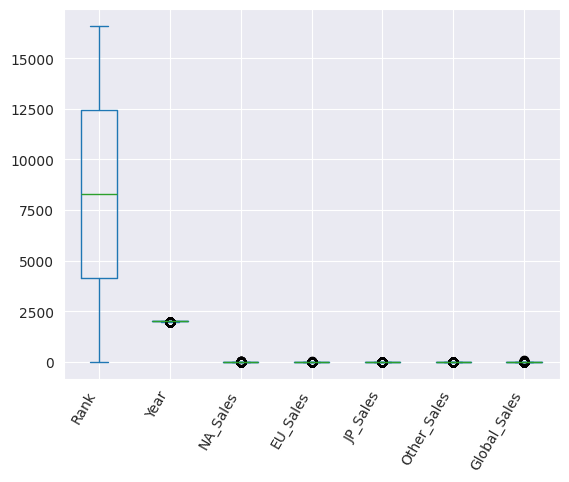

In [41]:
df.plot.box()
plt.xticks(rotation=60, ha='right');

# Relatório Geral:

* O gênero de ação é o mais vendido
* A Nintendo é a editora mais vendida
* PS2 é a plataforma com mais jogos vendidos

# Distribuição dos dados:

* O ano mínimo registrado é 1980, e o máximo é 2020
* As vendas globais variam de 0.01 milhões até 82.74 milhões
* A mediana das vendas globais é 0.17 milhões, indicando que a maioria dos jogos vende pouco, enquanto poucos jogos vendem muito

# Etapa 2

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ["Platform", "Genre", "Publisher"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [44]:
df.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
0     1                Wii Sports        26  2006     10        359     41.49   
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37

In [46]:
x = df.drop(columns=["Global_Sales", "Name", "Rank"])
y = df["Global_Sales"]

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [55]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def avaliar_modelo(nome, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{nome}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

avaliar_modelo("Regressão Linear", y_test, y_pred_lr)
avaliar_modelo("Random Forest", y_test, y_pred_rf)
avaliar_modelo("XGBoost", y_test, y_pred_xgb)

Regressão Linear: RMSE = 0.01, R² = 1.00
Random Forest: RMSE = 0.87, R² = 0.82
XGBoost: RMSE = 0.97, R² = 0.78


In [59]:
novo_jogo = pd.DataFrame({
    "Platform": [label_encoders["Platform"].transform(["PS4"])[0]],
    "Year": [2025],
    "Genre": [label_encoders["Genre"].transform(["Action"])[0]],
    "Publisher": [label_encoders["Publisher"].transform(["Sony Computer Entertainment"])[0]],
    "NA_Sales": [0.5],
    "EU_Sales": [0.3],
    "JP_Sales": [0.1],
    "Other_Sales": [0.2]
})

# Previsão usando o melhor modelo
previsao = rf.predict(novo_jogo)
print(f"Vendas previstas: {previsao[0]:.2f} milhões de unidades")

Vendas previstas: 1.02 milhões de unidades
